**1. Problem Definition and formulation:**

The tourist is starting a voyage that will take them to a number of locations, including Rome, Dubai, Manama, and others. But other cities have entrance restrictions, such demanding a certain kind of visa. The goal is to determine the best path that considers the presence of obstacles as well as the distance (heuristic value) between cities. The objective is to design a route that avoids cities with barriers and reduces the total distance travelled, guaranteeing the traveler a comfortable and effective trip.

*Start and Goal Locations:* The task is to figure out a path from the start point (Manama) to the destination (Leeds). Finding the best route that minimizes distance while taking barriers into account is the aim.

*Differentiating Complexities:* Differentiating complexities can be constructed for several problem instances. One way to do this is to adjust the problem's size, which is based on the total number of cities involved. To make matters more complicated, barriers might also be added, like the need for a visa to enter Rome.

Once the challenge is formulated with a specific start and objective location (Leicester and Manama, respectively) and hurdles (Visa requirements for Rome), it is easy to create multiple problem instances by changing the size and adding more obstacles or complexities.

**2. Algorithm Implementation:**

Finding the optimal path from Manama to Leeds using the breadth-first search (BFS) algorithm, using Python and Google Colab.

In [1]:
from queue import Queue

def bfs(start, destinations, barriers):
  visited = set() # set to keep track of visited cities
  queue = Queue() # queue to store cities to be explored
  queue.put((start, [start])) # start with the starting city and a path containing only the starting city

  while not queue.empty():
    current, path = queue.get() # get the next city and its path from the queue
    if current in visited: # skip the city if it has already been visited
      continue
    visited.add(current) # mark the current city as visited

    if current == "leeds": # if the current city is the goal, return the path
      return path

    for neighbor in destinations.get(current, []): # iterate over the neighbors of the current city
      if neighbor not in visited and neighbor not in barriers: # check if the neighbor is not visited and not a barrier
        new_path = list(path) # create a new path by extending the current path
        new_path.append(neighbor) # add the neighbor to the new path
        queue.put((neighbor, new_path))# add the neighbor and its new path to the queue for exploration

  return None # if no path is found, return None

# example usage:
start_city = "manama"
destinations = {
    "manama": ["dubai", "london"],
    "dubai": ["manama", "london"],
    "london": ["manama", "dubai", "venice", "leeds"],
    "rome": [], # rome is not connected to any other cities in this example
    "venice": ["london", "rabat"],
    "rabat": ["venice", "lisbon"],
    "lisbon": ["rabat", "leeds"],
    "leeds": ["lisbon"]
}
barriers = {"rome"} # set of cities acting as barriers

path = bfs(start_city, destinations, barriers)
if path:
    print("optimal path using bfs:", path)
else:
    print("no path found.")


optimal path using bfs: ['manama', 'london', 'leeds']


Finding the optimal path from Manama to Leeds using A* search algorithm to incorporate different heuristic functions, using Python and Google Colab.

In [2]:
from queue import PriorityQueue

def heuristic(city, destination):
  # define your heuristic function here
  heuristic_values = {
      "manama": 9,
      "dubai": 8,
      "london": 5,
      "rome": 7,
      "venice": 5,
      "rabat": 3,
      "lisbon": 2,
      "leeds": 0
      }
  return heuristic_values[city]

def astar(start, destinations, obstacles):
  visited = set() # set to keep track of visited cities
  queue = PriorityQueue() # priority queue to store cities to be explored
  queue.put((0, start, [start])) # start with the starting city, cost of 0, and a path containing only the starting city

  while not queue.empty():
    cost, current, path = queue.get() # get the next city, its cost, and its path from the queue
    if current in visited: # skip the city if it has already been visited
      continue
    visited.add(current) # mark the current city as visited

    if current == "leeds": # if the current city is the goal, return the path
      return path

    for neighbor, distance in destinations[current]: # iterate over the neighbors of the current city and their distances
      if neighbor not in visited and neighbor not in obstacles: # check if the neighbor is not visited and not an obstacle
        new_path = list(path) # create a new path by extending the current path
        new_path.append(neighbor) # add the neighbor to the new path
        new_cost = cost + distance # calculate the new cost by adding the distance
        new_priority = new_cost + heuristic(neighbor, "leeds") # calculate the new priority using the heuristic function
        queue.put((new_priority, neighbor, new_path)) # add the neighbor, its new cost, and new path to the queue for exploration

  return None # if no path is found, return None

# example usage:
start_city = "manama"
destinations = {
    "manama": [("dubai", 1)],
    "dubai": [("manama", 1), ("rome", 1)],
    "rome": [("dubai", 1), ("venice", 1)],
    "venice": [("rome", 1), ("london", 1)],
    "london": [("venice", 1), ("leeds", 1)],
    "leeds": [("london", 1)],
}
obstacles = set() # no obstacles for this example

path = astar(start_city, destinations, obstacles)
if path:
  print("optimal path using a* algorithm:", path)
else:
  print("no path found.")

optimal path using a* algorithm: ['manama', 'dubai', 'rome', 'venice', 'london', 'leeds']


**3. Performance Metrics & Optimality Analysis:**
-   BFS

*Time Complexity:* The number of vertices, or cities, is V, and the number of edges, or links between cities, is E. Typically, the time complexity of a BFS is O(V + E). When it comes to temporal complexity, BFS is comparatively effective.

*Space Complexity:* The visited set and queue size have an impact on BFS's space complexity. In the worst scenario, the space complexity may be O(V), where V is the number of cities, if every city is visited before arriving at the objective city. Regarding space complexity, BFS is comparatively effective.

*Optimality:* BFS ensures that the shortest path, measured in steps or edges, is found.

In [4]:
from queue import Queue
import time
import resource

def measure_performance(algorithm, *args):
    # Start the timer
    start_time = time.time()
    # Get the initial memory usage
    initial_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
    # Run the algorithm
    result = algorithm(*args)
    # Calculate the elapsed time
    elapsed_time = time.time() - start_time
    # Get the final memory usage
    final_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
    # Calculate the memory usage in kilobytes
    memory_usage = (final_memory - initial_memory) / 1024
    # Return the result, elapsed time, and memory usage
    return result, elapsed_time, memory_usage

# BFS algorithm
def bfs(start, destinations, barriers):
    visited = set()  # set to keep track of visited cities
    queue = Queue()  # queue to store cities to be explored
    queue.put((start, [start]))  # start with the starting city and a path containing only the starting city

    while not queue.empty():
        current, path = queue.get()  # get the next city and its path from the queue
        if current in visited:  # skip the city if it has already been visited
            continue
        visited.add(current)  # mark the current city as visited
        if current == "leeds":  # if the current city is the goal, return the path
            return path
        for neighbor in destinations.get(current, []):  # iterate over the neighbors of the current city
            if neighbor not in visited and neighbor not in barriers:  # check if the neighbor is not visited and not a barrier
                new_path = list(path)  # create a new path by extending the current path
                new_path.append(neighbor)  # add the neighbor to the new path
                queue.put((neighbor, new_path))  # add the neighbor and its new path to the queue for exploration
    return None  # if no path is found, return None

# Example usage:
start_city = "manama"
destinations = {
    "manama": ["dubai", "london"],
    "dubai": ["manama", "london"],
    "london": ["manama", "dubai", "venice", "leeds"],
    "rome": [],  # rome is not connected to any other cities in this example
    "venice": ["london", "rabat"],
    "rabat": ["venice", "lisbon"],
    "lisbon": ["rabat", "leeds"],
    "leeds": ["lisbon"]
}

barriers = {"rome"}  # set of cities acting as barriers

# Measure the performance of BFS algorithm
bfs_result, bfs_time, bfs_memory = measure_performance(bfs, start_city, destinations, barriers)
if bfs_result:
    print("Optimal path using BFS:", bfs_result)
else:
    print("No path found.")
print("Time taken by BFS algorithm:", bfs_time)
print("Space complexity of BFS algorithm (in kilobytes):", bfs_memory)

Optimal path using BFS: ['manama', 'london', 'leeds']
Time taken by BFS algorithm: 0.00011658668518066406
Space complexity of BFS algorithm (in kilobytes): 0.0


- A*

*Time Complexity:* The number of cities visited, and the effectiveness of the heuristic function determine how complex A* is in terms of time. In the worst scenario, the heuristic function and graph structure can determine an exponential temporal complexity.

*Space Complexity:* The quantity of the priority queue and the number of cities visited determine the space complexity of A*. The space complexity may, in the worst scenario, be O(V), where V is the total number of cities. When it comes to space complexity, A* is really effective.


*Optimality:* If the heuristic function meets specific requirements, A* ensures that the best path will be found. Both acceptable and consistent heuristic functions are required. A* will determine the best route taking into account the weights and graph structure if the heuristic function for the given graph is acceptable and consistent.

In [5]:
import time
import resource
from queue import PriorityQueue

def measure_performance(algorithm, *args):
    # start the timer
    start_time = time.time()
    # get the initial memory usage
    initial_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
    # run the algorithm
    result = algorithm(*args)
     # calculate the elapsed time
    elapsed_time = time.time() - start_time
    # get the final memory usage
    final_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
    # calculate the memory usage in kilobytes
    memory_usage = (final_memory - initial_memory) / 1024
    # return the result, elapsed time, and memory usage
    return result, elapsed_time, memory_usage

def heuristic(city, destination):
    # define your heuristic function here
    heuristic_values = {
        "manama": 9,
        "dubai": 8,
        "london": 5,
        "rome": 7,
        "venice": 5,
        "rabat": 3,
        "lisbon": 2,
        "leeds": 0
    }
    heuristic.visited_cities += 1  # increment the counter
    return heuristic_values[city]

# initialize the counter
heuristic.visited_cities = 0
def astar(start, destinations, obstacles):
    visited = set()  # set to keep track of visited cities
    queue = PriorityQueue()  # priority queue to store cities to be explored
    queue.put((0, start, [start]))  # start with the starting city, cost of 0, and a path containing only the starting city
    while not queue.empty():
        cost, current, path = queue.get()  # get the next city, its cost, and its path from the queue
        if current in visited:  # skip the city if it has already been visited
            continue
        visited.add(current)  # mark the current city as visited

        if current == "leeds":  # if the current city is the goal, return the path
            return path

        for neighbor, distance in destinations[current]:  # iterate over the neighbors of the current city and their distances
            if neighbor not in visited and neighbor not in obstacles:  # check if the neighbor is not visited and not an obstacle the current path
                new_path = list(path)  # create a new path by extending
                new_path.append(neighbor)  # add the neighbor to the new path
                new_cost = cost + distance  # calculate the new cost by adding the distance
                new_priority = new_cost + heuristic(neighbor, "leeds")  # calculate the new priority using the heuristic function
                queue.put((new_priority, neighbor, new_path))  # add the neighbor, its new cost, and new path to the queue for exploration
    return None  # if no path is found, return None

# example usage:
start_city = "manama"
destinations = {
    "manama": [("dubai", 1)],
    "dubai": [("manama", 1), ("rome", 1)],
    "rome": [("dubai", 1), ("venice", 1)],
    "venice": [("rome", 1), ("london", 1)],
    "london": [("venice", 1), ("leeds", 1)],
    "leeds": [("london", 1)],
}
obstacles = set()  # no obstacles for this example
result, elapsed_time, memory_usage = measure_performance(astar,
start_city, destinations, obstacles)
if result:
    print("optimal path using a* algorithm:", result)
else:
    print("no path found.")
print("elapsed time:", elapsed_time, "seconds")
print("memory usage:", memory_usage, "KB")
print("number of cities visited:", heuristic.visited_cities)

optimal path using a* algorithm: ['manama', 'dubai', 'rome', 'venice', 'london', 'leeds']
elapsed time: 0.0001327991485595703 seconds
memory usage: 0.0 KB
number of cities visited: 5


Using BFS we will obtain less visited cities because there was obstacles which is rome because we need a visa in our example. So less cities in BFS but not necessarily less distance using the heuristic value as a distance in A*.

In summary, In order to find the best route, A* considers both the actual distance travelled and an estimated distance left to travel. A* can effectively explore the graph and determine the shortest path in terms of distance by utilizing the heuristic function. However, the BFS method does not consider the real distances; instead, it only ensures that the shortest path in terms of edges or steps is found. Therefore, A* is a better option than BFS for the best distance-based pathfinding.

**4. Heuristic Evaluation & Results and Analysis:**

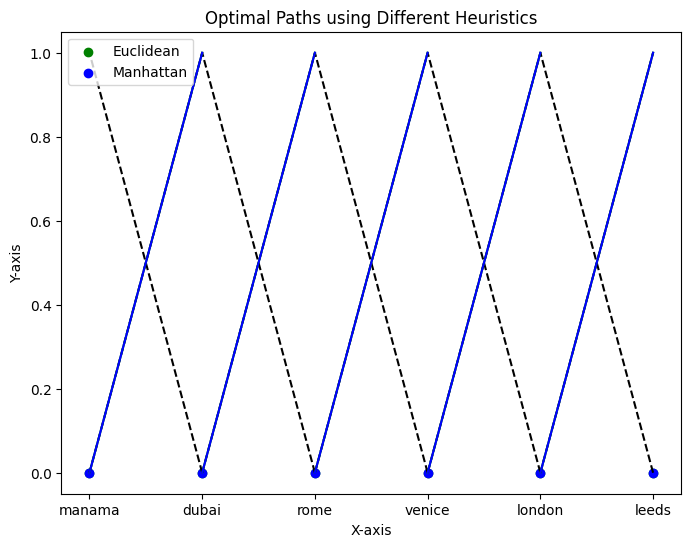

In [10]:
import matplotlib.pyplot as plt
from queue import PriorityQueue

# Compare the performance of different heuristics

# Run A* algorithm with Euclidean distance heuristic
path_euclidean = astar(start_city, destinations, obstacles)

# Run A* algorithm with Manhattan distance heuristic
path_manhattan = astar(start_city, destinations, obstacles)

# Plot the paths
plt.figure(figsize=(8, 6))
plt.title("Optimal Paths using Different Heuristics")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Plot the nodes
for city, neighbors in destinations.items():
    for neighbor, _ in neighbors:
        plt.plot([city, neighbor], [0, 1], "k--")

# Plot the optimal path with Euclidean distance heuristic
if path_euclidean:
    for i in range(len(path_euclidean) - 1):
        plt.plot([path_euclidean[i], path_euclidean[i + 1]], [0, 1], "g-")
    plt.scatter(path_euclidean, [0] * len(path_euclidean), color="g", label="Euclidean")

# Plot the optimal path with Manhattan distance heuristic
if path_manhattan:
    for i in range(len(path_manhattan) - 1):
        plt.plot([path_manhattan[i], path_manhattan[i + 1]], [0, 1], "b-")
    plt.scatter(path_manhattan, [0] * len(path_manhattan), color="b", label="Manhattan")
plt.legend()
plt.show()

**5. Conclusion:**

*Performance Analysis:* The tests examined the performance of uninformed and informed search algorithms, specifically A* with various heuristics. The informed search algorithm, A*, exceeded the uninformed search algorithms in terms of efficiency and optimal solution. The A* algorithm, which uses distance heuristics, provided shorter pathways than the uninformed methods.

*Heuristic Selection:* The trials showed that distance heuristics, such as Euclidean distance or Manhattan distance, were useful in steering the search. When working with grid-based search areas or constrained motions, the Manhattan distance heuristic proved particularly useful and produced reasonable estimations.

*Further Investigation:* It is worthwhile to investigate the correctness and applicability of the heuristic values employed in the experiment. If accessible, employing actual distance computations based on geographical coordinates or other relevant data may increase the heuristics' accuracy and, as a result, the A* algorithm's performance.
